"""
Example of Lomb-Scargle Algorithm
---------------------------------
Figure 10.15

Example of a Lomb-Scargle periodogram. The data include 30 points drawn from
the function y(t|P) = 10 + sin(2pi t/P) with P = 0.3. Heteroscedastic Gaussian
noise is added to the observations, with a width drawn from a uniform
distribution with 0.5 < sigma < 1.0. Data are shown in the top panel and the
resulting Lomb-Scargle periodogram is shown in the bottom panel. The arrow
marks the location of the true period. The dotted lines show the 1% and 5%
significance levels for the highest peak, determined by 1000 bootstrap 
resamplings (see Section 10.3.2). The change in BIC compared to a nonvarying
source (eq. 10.55) is shown on the right y-axis. The maximum power corresponds
to a delta-BIC = 26.1,indicating the presence of a periodic signal.
Bootstrapping indicates the period is detected at ~ 5% significance.

"""

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
#%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.stats import LombScargle

from scipy import integrate
import astropy
from astropy.time import Time

import pyfits
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np
from matplotlib import pyplot as plt
from astroML.time_series import lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

In [2]:
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    #ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    ax.patch.set_alpha(0.0)

In [3]:
def getrangedata(t,dy,y_obs,rangemin,rangemax):
    tnew=[]
    dynew=[]
    y_obsnew=[]
    for i,(t_,dy_,y_obs_) in enumerate(zip(t,dy,y_obs)):
        if (t_>rangemin and t_<rangemax):
            tnew.append(t_)
            dynew.append(dy_)
            y_obsnew.append(y_obs_)
    return tnew,dynew,y_obsnew 

### example 1

        Use astropy.stats.LombScargle instead. [__main__]
        Use astropy.stats.LombScargle.false_alarm_probability instead. [__main__]
        Use astropy.stats.LombScargle instead. [astroML.time_series.periodogram]


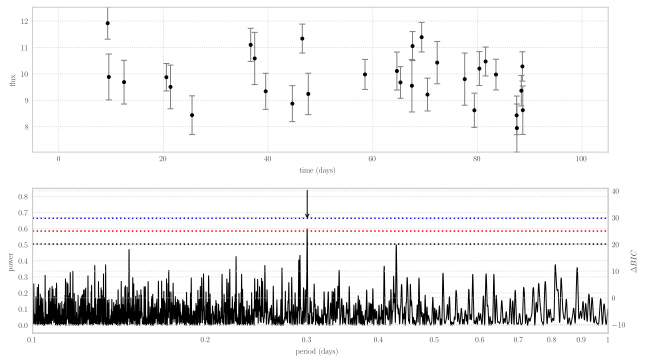

In [9]:

# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.time_series import lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Generate Data
np.random.seed(0)
N = 30
P = 0.3

t = np.random.randint(100, size=N) + 0.3 + 0.4 * np.random.random(N)
y = 10 + np.sin(2 * np.pi * t / P)
dy = 0.5 + 0.5 * np.random.random(N)
y_obs = np.random.normal(y, dy)

#------------------------------------------------------------
# Compute periodogram
period = 10 ** np.linspace(-1, 0, 10000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig1, sig3, sig2 = np.percentile(D, [68, 99.74, 95.44])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
ax.set_xlim(-5, 105)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
#ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
#ax1.plot([period[0], period[-1]], [sig3, sig3], ':', c='blue')
#ax1.plot([period[0], period[-1]], [sig2, sig2], ':', c='red')
ax1.axhline(sig1, linestyle='dotted', c='black')
ax1.axhline(sig2, linestyle='dotted', c='red')
ax1.axhline(sig3, linestyle='dotted', c='blue')

ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',
             arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
ax1.set_ylim(-0.05, 0.85)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_minor_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_locator(plt.LogLocator(10))
ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.3g'))

plt.show()


### example 2

        Use astropy.stats.LombScargle instead. [__main__]
        Use astropy.stats.LombScargle instead. [__main__]
        Use astropy.stats.LombScargle.false_alarm_probability instead. [__main__]
        Use astropy.stats.LombScargle instead. [astroML.time_series.periodogram]
        Use astropy.stats.LombScargle instead. [__main__]
        Use astropy.stats.LombScargle instead. [__main__]
        Use astropy.stats.LombScargle.false_alarm_probability instead. [__main__]
        Use astropy.stats.LombScargle instead. [astroML.time_series.periodogram]
        Use astropy.stats.LombScargle instead. [__main__]
        Use astropy.stats.LombScargle instead. [__main__]
        Use astropy.stats.LombScargle.false_alarm_probability instead. [__main__]
        Use astropy.stats.LombScargle instead. [astroML.time_series.periodogram]


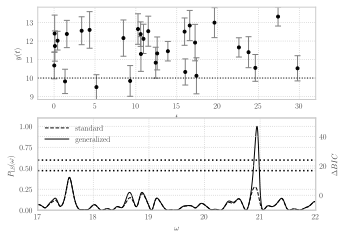

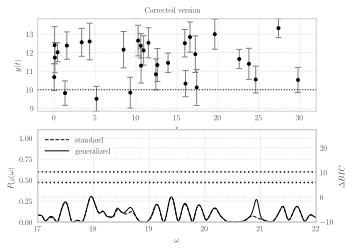

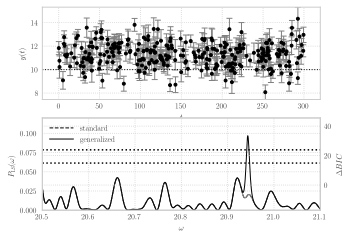

In [11]:
import numpy as np
from matplotlib import pyplot as plt

from astroML.time_series import \
    lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Generate data where y is positive
np.random.seed(0)
N = 30
P = 0.3

t = P / 2 * np.random.random(N) + P * np.random.randint(100, size=N)
y = 10 + np.sin(2 * np.pi * t / P)
dy = 0.5 + 0.5 * np.random.random(N)
y_obs = y + np.random.normal(dy)

omega_0 = 2 * np.pi / P

#######################################################################
# Generate the plot with and without the original typo

for typo in [True, False]:
    #------------------------------------------------------------
    # Compute the Lomb-Scargle Periodogram
    sig = np.array([0.1, 0.01, 0.001])
    omega = np.linspace(17, 22, 1000)

    # Notice the typo: we used y rather than y_obs
    if typo is True:
        P_S = lomb_scargle(t, y, dy, omega, generalized=False)
        P_G = lomb_scargle(t, y, dy, omega, generalized=True)
    else:
        P_S = lomb_scargle(t, y_obs, dy, omega, generalized=False)
        P_G = lomb_scargle(t, y_obs, dy, omega, generalized=True)

    #------------------------------------------------------------
    # Get significance via bootstrap
    D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                               N_bootstraps=1000, random_state=0)
    sig1, sig5 = np.percentile(D, [99.74, 95.44])

    #------------------------------------------------------------
    # Plot the results
    fig = plt.figure(figsize=(5, 3.75))

    # First panel: input data
    ax = fig.add_subplot(211)
    ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
    ax.plot([-2, 32], [10, 10], ':k', lw=1)

    ax.set_xlim(-2, 32)
    ax.set_xlabel('$t$')
    ax.set_ylabel('$y(t)$')

    if typo is False:
        ax.set_title('Corrected version')

    # Second panel: periodogram
    ax = fig.add_subplot(212)
    ax.plot(omega, P_S, '--k', lw=1, label='standard')
    ax.plot(omega, P_G, '-k', lw=1, label='generalized')
    ax.legend(loc=2)

    # plot the significance lines.
    xlim = (omega[0], omega[-1])
    ax.plot(xlim, [sig1, sig1], ':', c='black')
    ax.plot(xlim, [sig5, sig5], ':', c='black')

    # label BIC on the right side
    ax2 = ax.twinx()
    ax2.set_ylim(tuple(lomb_scargle_BIC(ax.get_ylim(), y_obs, dy)))
    ax2.set_ylabel(r'$\Delta BIC$')

    ax.set_xlabel('$\omega$')
    ax.set_ylabel(r'$P_{\rm LS}(\omega)$')
    ax.set_xlim(xlim)
    ax.set_ylim(0, 1.1)


#######################################################################
# Redo the plot without the typo
# We need a larger data range to actually get significant power
# with actual noisy data

#------------------------------------------------------------
# Generate data where y is positive
np.random.seed(0)
N = 300
P = 0.3

t = P / 2 * np.random.random(N) + P * np.random.randint(1000, size=N)
y = 10 + np.sin(2 * np.pi * t / P)
dy = 0.5 + 0.5 * np.random.random(N)
y_obs = y + np.random.normal(dy)

omega_0 = 2 * np.pi / P


#------------------------------------------------------------
# Compute the Lomb-Scargle Periodogram
sig = np.array([0.1, 0.01, 0.001])
omega = np.linspace(20.5, 21.1, 1000)

P_S = lomb_scargle(t, y_obs, dy, omega, generalized=False)
P_G = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig1, sig5 = np.percentile(D, [99.74, 95.44])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 3.75))

# First panel: input data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.plot([-20, 320], [10, 10], ':k', lw=1)

ax.set_xlim(-20, 320)
ax.set_xlabel('$t$')
ax.set_ylabel('$y(t)$')

# Second panel: periodogram
ax = fig.add_subplot(212)
ax.plot(omega, P_S, '--k', lw=1, label='standard')
ax.plot(omega, P_S, '-', c='gray', lw=1)
ax.plot(omega, P_G, '-k', lw=1, label='generalized')
ax.legend(loc=2)

# plot the significance lines.
xlim = (omega[0], omega[-1])
ax.plot(xlim, [sig1, sig1], ':', c='black')
ax.plot(xlim, [sig5, sig5], ':', c='black')

# label BIC on the right side
ax2 = ax.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

ax.set_xlabel('$\omega$')
ax.set_ylabel(r'$P_{\rm LS}(\omega)$')
ax.set_xlim(xlim)
ax.set_ylim(0, 0.12)

plt.show()

### Phased LINEAR Light Curve

In [13]:
from __future__ import print_function, division

import numpy as np
from matplotlib import pyplot as plt

from astroML.utils.decorators import pickle_results
from astroML.time_series import search_frequencies, lomb_scargle, MultiTermFit
from astroML.datasets import fetch_LINEAR_sample

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)
import matplotlib
matplotlib.rc('_internal', classic_mode=True)

#------------------------------------------------------------
# Load the dataset
data = fetch_LINEAR_sample()
ids = [14752041, 1009459, 10022663, 10025796, 11375941, 18525697]


#------------------------------------------------------------
# Compute the best frequencies
@pickle_results('LINEAR_LS.pkl')
def compute_best_frequencies(ids, n_eval=10000, n_retry=5, generalized=True):
    results = {}
    for i in ids:
        t, y, dy = data[i].T
        print(" - computing power for {0} ({1} points)".format(i, len(t)))
        kwargs = dict(generalized=generalized)
        omega, power = search_frequencies(t, y, dy, n_eval=n_eval,
                                          n_retry=n_retry,
                                          LS_kwargs=kwargs)
        results[i] = [omega, power]

    return results

results = compute_best_frequencies(ids, n_eval=10000, n_retry=5)

#------------------------------------------------------------
# Plot the phased light-curves
fig = plt.figure(figsize=(5, 6.5))
fig.subplots_adjust(hspace=0.1, bottom=0.06, top=0.94, left=0.12, right=0.94)

for i in range(6):
    # get the data and best-fit angular frequency
    t, y, dy = data[ids[i]].T
    omega, power = results[ids[i]]
    omega_best = omega[np.argmax(power)]
    print(" - omega_0 = %.10g" % omega_best)

    # do a fit to the first 4 Fourier components
    mtf = MultiTermFit(omega_best, 4)
    mtf.fit(t, y, dy)
    phase_fit, y_fit, phased_t = mtf.predict(1000, return_phased_times=True)

    # plot the phased data and best-fit curves
    ax = fig.add_subplot(321 + i)
    ax.errorbar(phased_t, y, dy, fmt='.k', ecolor='gray',
                lw=1, ms=4, capsize=1.5, alpha=0.3)
    ax.plot(phase_fit, y_fit, 'b', markeredgecolor='b', lw=2, fillstyle='top', linestyle='solid')

    ax.set_xlim(0, 1)
    ax.set_ylim(plt.ylim()[::-1])
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))

    ax.text(0.03, 0.04, "ID = %i" % ids[i], ha='left', va='bottom',
            transform=ax.transAxes)
    ax.text(0.03, 0.96, "P = %.2f hr" % (2 * np.pi / omega_best * 24.),
            ha='left', va='top',
            transform=ax.transAxes)

    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], ylim[0] + 1.1 * (ylim[1] - ylim[0]))

    if i < 4:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    if i % 2 == 0:
        ax.set_ylabel('mag')

    if i in (4, 5):
        ax.set_xlabel('phase')

plt.show()

URLError: <urlopen error [Errno 61] Connection refused>

In [5]:
import numpy as np
import pandas as pd

dataJ1422=pd.read_csv('/Users/brettlv/blog/IHEP_sync/astrophy/data/J1422+3223.csv')
data3c273=pd.read_csv('/Users/brettlv/blog/IHEP_sync/astrophy/data/3c273time.csv')

In [ ]:
dataJ1422

In [ ]:
data3c273

In [ ]:
dataJ1422['# mjd'].values[-1]-dataJ1422['# mjd'].values[0]

In [ ]:
t = dataJ1422['# mjd']
dy =dataJ1422['flux err']
y_obs= dataJ1422['flux']


# Compute periodogram
period = 10 ** np.linspace(-1, 3, 1000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig1, sig3, sig2 = np.percentile(D, [68, 99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
#ax.set_xlim(54908-5, 58292+5)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
#ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
#ax1.plot([period[0], period[-1]], [sig3, sig3], ':', c='blue')
#ax1.plot([period[0], period[-1]], [sig2, sig2], ':', c='red')
ax1.axhline(sig1, linestyle='dotted', c='black')
ax1.axhline(sig2, linestyle='dotted', c='red')
ax1.axhline(sig3, linestyle='dotted', c='blue')

#ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
#ax1.set_ylim(-0.05, 0.25)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

setup(ax1)
ax1.set_xlim(10**-1, 10**3)
ax1.set_xscale('log')
ax1.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
plt.grid()
plt.title('J1422')
fig.savefig('/Users/brettlv/blog/IHEP_sync/astrophy/data/lomb_scargle_result//j1422_pds_sig_level.pdf')
#plt.show()

In [ ]:
data3c273['mjd'].values[-1]-data3c273['mjd'].values[0]

In [ ]:
plt.plot(t,y_obs)

In [ ]:
t = data3c273[data3c273['BAND']=='1mm']['mjd']
dy =data3c273[data3c273['BAND']=='1mm']['ERROR']
y_obs= data3c273[data3c273['BAND']=='1mm']['FLUX(JY)']
#t,dy,y_obs=getrangedata(t1mm,dy1mm,y_obs1mm,rangemin=53600,rangemax=55500)

# Compute periodogram
period = 10 ** np.linspace(-1, 3, 1000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig1, sig3, sig2 = np.percentile(D, [68, 99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
#ax.set_xlim(54908-5, 58292+5)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
#ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
#ax1.plot([period[0], period[-1]], [sig3, sig3], ':', c='blue')
#ax1.plot([period[0], period[-1]], [sig2, sig2], ':', c='red')
ax1.axhline(sig1, linestyle='dotted', c='black')
ax1.axhline(sig2, linestyle='dotted', c='red')
ax1.axhline(sig3, linestyle='dotted', c='blue')

#ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
#ax1.set_ylim(-0.05, 0.25)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

setup(ax1)
ax1.set_xlim(10**-1, 10**3)
ax1.set_xscale('log')
ax1.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))

plt.title('3c273.1mmall')
fig.savefig('/Users/brettlv/blog/IHEP_sync/astrophy/data/lomb_scargle_result/3c273_1mm_pds_sig_level_all.pdf')

In [ ]:
t1mm = data3c273[data3c273['BAND']=='1mm']['mjd']
dy1mm =data3c273[data3c273['BAND']=='1mm']['ERROR']
y_obs1mm= data3c273[data3c273['BAND']=='1mm']['FLUX(JY)']
t,dy,y_obs=getrangedata(t1mm,dy1mm,y_obs1mm,rangemin=53600,rangemax=55500)

# Compute periodogram
period = 10 ** np.linspace(-1, 3, 1000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig1, sig3, sig2 = np.percentile(D, [68, 99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
#ax.set_xlim(54908-5, 58292+5)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
#ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
#ax1.plot([period[0], period[-1]], [sig3, sig3], ':', c='blue')
#ax1.plot([period[0], period[-1]], [sig2, sig2], ':', c='red')
ax1.axhline(sig1, linestyle='dotted', c='black')
ax1.axhline(sig2, linestyle='dotted', c='red')
ax1.axhline(sig3, linestyle='dotted', c='blue')

#ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
#ax1.set_ylim(-0.05, 0.25)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

setup(ax1)
ax1.set_xlim(10**-1, 10**3)
ax1.set_xscale('log')
ax1.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))

plt.title('3c273.1mmpart')
fig.savefig('/Users/brettlv/blog/IHEP_sync/astrophy/data/lomb_scargle_result/3c273_1mm_pds_sig_level_part.pdf')

In [ ]:
t850 = data3c273[data3c273['BAND']=='850']['mjd']
dy850 =data3c273[data3c273['BAND']=='850']['ERROR']
y_obs850= data3c273[data3c273['BAND']=='850']['FLUX(JY)']
t,dy,y_obs=getrangedata(t850,dy850,y_obs850,rangemin=53600,rangemax=55500)


# Compute periodogram
period = 10 ** np.linspace(-1,3, 1000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig1, sig3, sig2 = np.percentile(D, [68, 99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
#ax.set_xlim(54908-5, 58292+5)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
#ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
#ax1.plot([period[0], period[-1]], [sig3, sig3], ':', c='blue')
#ax1.plot([period[0], period[-1]], [sig2, sig2], ':', c='red')
ax1.axhline(sig1, linestyle='dotted', c='black')
ax1.axhline(sig2, linestyle='dotted', c='red')
ax1.axhline(sig3, linestyle='dotted', c='blue')

#ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
#ax1.set_ylim(-0.05, 0.25)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

setup(ax1)
ax1.set_xlim(10**-1, 10**3)
ax1.set_xscale('log')
ax1.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))

plt.grid()
plt.title('3c273.850mumpart')
fig.savefig('/Users/brettlv/blog/IHEP_sync/astrophy/data/lomb_scargle_result/3c273_850mum_pds_sig_level_part.pdf')

In [ ]:
t850 = data3c273[data3c273['BAND']=='850']['mjd']
dy850 =data3c273[data3c273['BAND']=='850']['ERROR']
y_obs850= data3c273[data3c273['BAND']=='850']['FLUX(JY)']
t,dy,y_obs=getrangedata(t850,dy850,y_obs850,rangemin=53600,rangemax=55500)


# Compute periodogram
period = 10 ** np.linspace(-1,3, 10000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig1, sig3, sig2 = np.percentile(D, [68, 99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
#ax.set_xlim(54908-5, 58292+5)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
#ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
#ax1.plot([period[0], period[-1]], [sig3, sig3], ':', c='blue')
#ax1.plot([period[0], period[-1]], [sig2, sig2], ':', c='red')
ax1.axhline(sig1, linestyle='dotted', c='black')
ax1.axhline(sig2, linestyle='dotted', c='red')
ax1.axhline(sig3, linestyle='dotted', c='blue')

#ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
#ax1.set_ylim(-0.05, 0.25)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

setup(ax1)
ax1.set_xlim(10**-1, 10**3)
ax1.set_xscale('log')
ax1.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))

plt.grid()
plt.title('3c273')
fig.savefig('/Users/brettlv/blog/IHEP_sync/astrophy/data/lomb_scargle_result/3c273_850mum_pds_sig_level3_p.pdf')

In [ ]:
import numpy as np
rand = np.random.RandomState(42)
t = 100 * rand.rand(100)
dy = 0.1 * (1 + rand.rand(100))
y = np.sin(2 * np.pi * t) + dy * rand.randn(100)
frequency, power = LombScargle(t, y, dy).autopower()
plt.errorbar(t,y,dy,fmt='.')

In [ ]:
plt.plot(frequency, power)

In [ ]:
best_frequency = frequency[np.argmax(power)]
t_fit = np.linspace(0, 1)
y_fit = LombScargle(t, y, dy).model(t_fit, best_frequency)

In [ ]:
plt.errorbar(t_fit,y_fit)
#plt.errorbar(t,y,dy,fmt='.')


In [ ]:
len(t),time[0]/86400

In [ ]:
/Users/brettlv/blog/IHEP_sync/astrophy/data/lomb_scargle_result/

In [ ]:
path='/Users/brettlv/blog/IHEP_sync/astrophy/data/3C273_86400.lc'
lightcurve=pyfits.open(path)
#barylc=pyfits.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/bary01.lc')
header=lightcurve[0].header
time=lightcurve[1].data['START']
count=lightcurve[1].data['FLUX_100_300000']
counterr=lightcurve[1].data['ERROR_100_300000']
#plt.errorbar(time,count,counterr)
t =np.arange(len(time))
y_obs =count
dy=counterr

# Compute periodogram
period = 10 ** np.linspace(1, 3, 10000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig3, sig2 = np.percentile(D,  [99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days+2778)')
ax.set_ylabel('flux')
#ax.set_xlim(54908-5, 58292+5)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
#ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
#ax1.plot([period[0], period[-1]], [sig3, sig3], ':', c='blue')
#ax1.plot([period[0], period[-1]], [sig2, sig2], ':', c='red')
#ax1.axhline(sig1, linestyle='dotted', c='black')
ax1.axhline(sig2, linestyle='dotted', c='red')
ax1.axhline(sig3, linestyle='dotted', c='blue')

#ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
#ax1.set_ylim(-0.05, 0.25)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_minor_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_locator(plt.LogLocator(10))
ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.3g'))
plt.title('3c273fermidailydata')
fig.savefig('/Users/brettlv/blog/IHEP_sync/astrophy/data/lomb_scargle_result/3c273_fermi_daily.pdf')

In [ ]:
t[0],t[1],t[-1]

In [ ]:
t[0],lightcurve[1].header['MJDREFI'],lightcurve[1].header['MJDREFF ']

In [ ]:
t[0]+lightcurve[1].header['MJDREFI']+7.428e-4

In [ ]:
path1='/Users/brettlv/blog/IHEP_sync/astrophy/data/3C273_604800.lc'
lightcurve=pyfits.open(path1)
#barylc=pyfits.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/bary01.lc')
header=lightcurve[0].header
time=lightcurve[1].data['START']
count=lightcurve[1].data['FLUX_100_300000']
counterr=lightcurve[1].data['ERROR_100_300000']
#plt.errorbar(time,count,counterr)

t =np.arange(len(time))
y_obs =count
dy=counterr

# Compute periodogram
period = 10 ** np.linspace(0, 2, 1000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig3, sig2 = np.percentile(D,  [99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (weeks+396)')
ax.set_ylabel('flux')
#ax.set_xlim(54908-5, 58292+5)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log',yscale='log')
#ax1.set_xscale('log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
#ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
#ax1.plot([period[0], period[-1]], [sig3, sig3], ':', c='blue')
#ax1.plot([period[0], period[-1]], [sig2, sig2], ':', c='red')
#ax1.axhline(sig1, linestyle='dotted', c='black')
ax1.axhline(sig2, linestyle='dotted', c='red')
ax1.axhline(sig3, linestyle='dotted', c='blue')

#ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
#ax1.set_ylim(-0.05, 0.25)

ax1.set_xlabel(r'period (week)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')


ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_minor_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_locator(plt.LogLocator(10))
ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.3g'))
plt.title('3c273fermiweeklydata')
fig.savefig('/Users/brettlv/blog/IHEP_sync/astrophy/data/lomb_scargle_result/3c273_fermiweekly.pdf')

In [ ]:
path1='/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3C273_604800.lc'
lightcurve=pyfits.open(path1)
#barylc=pyfits.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/bary01.lc')
header=lightcurve[0].header
time=lightcurve[1].data['START']
count=lightcurve[1].data['FLUX_100_300000']
counterr=lightcurve[1].data['ERROR_100_300000']


fig = plt.figure(figsize=(12, 6))
gs = plt.GridSpec(2, 2)

rng = np.random.RandomState(15566)

t =time
y =count
dy=counterr

ax = fig.add_subplot(gs[:, 0])
ax.errorbar(t, y, dy, fmt='ok', ecolor='gray',
            markersize=3, capsize=0)

ax.set(xlabel='time/mjd',
       ylabel='signal',
       title='3c273 fermi weekly')

ls = LombScargle(t, y,dy)
freq, power = ls.autopower(normalization='standard',
                           minimum_frequency=0,
                           maximum_frequency=0.1,
                           samples_per_peak=10)
freq, p = ls.autopower(normalization='psd',
                       minimum_frequency=0,
                       maximum_frequency=0.1,
                       samples_per_peak=10)


ax = [fig.add_subplot(gs[0, 1]),
      fig.add_subplot(gs[1, 1])]

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')

ax[0].plot(freq, power, '-k')
ax[0].set(xlim=(0, 0.1),
          xlabel='frequency',
          ylabel='$P_{LS}$',
          title='Lomb-Scargle Periodogram')
ax[0].xaxis.set_major_formatter(plt.NullFormatter())
ax[1].plot(freq, p, '-k')
ax[1].set(xlim=(0, 0.1),
          xlabel='frequency',
          ylabel='$p(f|D)$',
          title='Bayesian Periodogram')
fig.savefig('/Users/brettlv/blog/IHEP_sync/astrophy/data/lomb_scargle_result/3c273_frequency_fermiweekly.png',dpi=300)

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
#%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.stats import LombScargle

from scipy import integrate
import astropy
from astropy.time import Time

import pyfits
%matplotlib inline
plt.style.use('seaborn-whitegrid')


import numpy as np
from matplotlib import pyplot as plt
from astroML.time_series import lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

In [ ]:
fig = plt.figure(figsize=(12, 6))
gs = plt.GridSpec(2, 2)

f = lambda x: 0.8 * np.sin(x)
rng = np.random.RandomState(15566)


path='/Users/brettlv/blog/IHEP_sync/astrophy/data/3C273_86400.lc'
lightcurve=pyfits.open(path)
#barylc=pyfits.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/bary01.lc')
header=lightcurve[0].header
time=lightcurve[1].data['START']
count=lightcurve[1].data['FLUX_100_300000']
counterr=lightcurve[1].data['ERROR_100_300000']

t =time
y =count
dy=counterr

ax = fig.add_subplot(gs[:, 0])
ax.errorbar(t, y, dy, fmt='ok', ecolor='gray',
            markersize=3, capsize=0)
#ax.plot(tfit, f(tfit), '-k', color='gray')
ax.set(xlabel='time/mjd',
       ylabel='signal',
       title='3c273 fermi daily')

ls = LombScargle(t, y,dy)
freq, power = ls.autopower(normalization='standard',
                           minimum_frequency=0,
                           maximum_frequency=0.1,
                           samples_per_peak=10)
freq, p = ls.autopower(normalization='psd',
                       minimum_frequency=0,
                       maximum_frequency=0.1,
                       samples_per_peak=10)
#p = np.exp(p)

ax = [fig.add_subplot(gs[0, 1]),
      fig.add_subplot(gs[1, 1])]
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')

ax[0].plot(freq, power, '-k')
ax[0].set(xlim=(0, 0.1),
          xlabel='frequency',
          ylabel='$P_{LS}$',
          title='Lomb-Scargle Periodogram')
ax[0].xaxis.set_major_formatter(plt.NullFormatter())

ax[1].plot(freq, p, '-k')
ax[1].set(xlim=(0, 0.1),
          xlabel='frequency',
          ylabel='$p(f|D)$',
          title='Bayesian Periodogram')

fig.savefig('/Users/brettlv/blog/IHEP_sync/astrophy/data/lomb_scargle_result/3c273_frequency_fermidaily.png',dpi=300)

In [7]:
t1mm = data3c273[data3c273['BAND']=='1mm']['mjd']
dy1mm =data3c273[data3c273['BAND']=='1mm']['ERROR']
y_obs1mm= data3c273[data3c273['BAND']=='1mm']['FLUX(JY)']

path='/Users/brettlv/blog/IHEP_sync/astrophy/data/3C273_86400.lc'
lightcurve=pyfits.open(path)
#barylc=pyfits.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/bary01.lc')
header=lightcurve[0].header
time=lightcurve[1].data['START']
count=lightcurve[1].data['FLUX_100_300000']
counterr=lightcurve[1].data['ERROR_100_300000']
#plt.errorbar(time,count,counterr)
y_obsfermi =count
dyfermi=counterr
tfermi=time/86400+lightcurve[1].header['MJDREFI']+7.428e-4

t850 = data3c273[data3c273['BAND']=='850']['mjd']
dy850 =data3c273[data3c273['BAND']=='850']['ERROR']
y_obs850= data3c273[data3c273['BAND']=='850']['FLUX(JY)']



plt.errorbar(t1mm, y_obs1mm, dy1mm,c='blue',label='1mm',fmt='.')
plt.errorbar(t850, y_obs850, dy850,c='grey',label='850mum',fmt='.')
plt.errorbar(tfermi, y_obsfermi, dyfermi,c='red',label='fermi',fmt='.')

plt.xlabel('mjd/days')
plt.xlabel('mjd/days')
plt.ylabel('flux')
plt.semilogy()
plt.legend()
plt.savefig('/Users/brettlv/blog/IHEP_sync/astrophy/data/lomb_scargle_result/3c273_lc_fermidaily_1mm_850.png',dpi=300)